# 觀察資料分布
* YELP
    * 50 review above 
    * join business, check-in and tips

# Import

In [1]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("../Data/yelp/restaurant_only.pkl")  

In [3]:
df.shape

(2112553, 20)

In [4]:
df.columns

Index(['business_id', 'stars_x', 'useful', 'funny', 'cool', 'text', 'date',
       'name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'stars_y', 'review_count', 'is_open', 'attributes',
       'categories', 'hours'],
      dtype='object')

# EDA

In [25]:
# calculate the city number of each state
for i in Counter(df.state):
    tmp = df[df.state==i]
    print(f'State : {i} ,\
    city no. : {len(Counter(tmp.city))},\
    postal_code cnt : {len(Counter(tmp.postal_code))},\
    restaurant no. : {len(Counter(tmp.name))}')
    

State : PA ,    city no. : 216,    postal_code cnt : 198,    restaurant no. : 3965
State : CA ,    city no. : 8,    postal_code cnt : 12,    restaurant no. : 490
State : TN ,    city no. : 33,    postal_code cnt : 51,    restaurant no. : 1505
State : LA ,    city no. : 22,    postal_code cnt : 42,    restaurant no. : 1319
State : FL ,    city no. : 97,    postal_code cnt : 121,    restaurant no. : 2917
State : IN ,    city no. : 27,    postal_code cnt : 60,    restaurant no. : 1234
State : NJ ,    city no. : 134,    postal_code cnt : 89,    restaurant no. : 987
State : NV ,    city no. : 8,    postal_code cnt : 20,    restaurant no. : 676
State : AB ,    city no. : 9,    postal_code cnt : 331,    restaurant no. : 371
State : MO ,    city no. : 63,    postal_code cnt : 59,    restaurant no. : 1247
State : AZ ,    city no. : 12,    postal_code cnt : 38,    restaurant no. : 884
State : ID ,    city no. : 6,    postal_code cnt : 16,    restaurant no. : 525
State : DE ,    city no. : 13,   

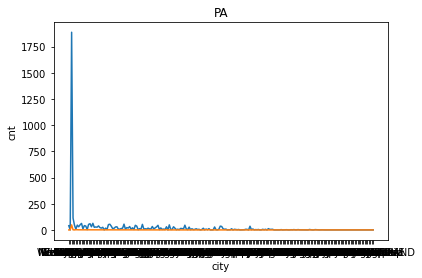

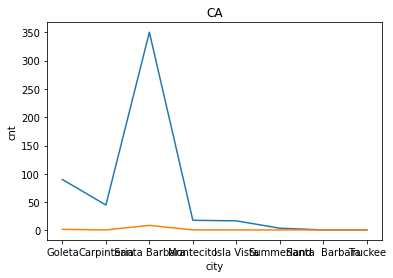

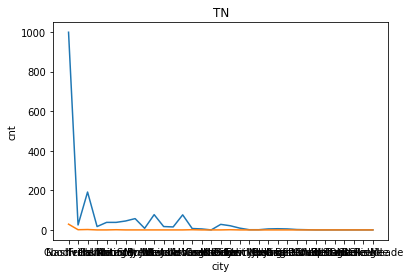

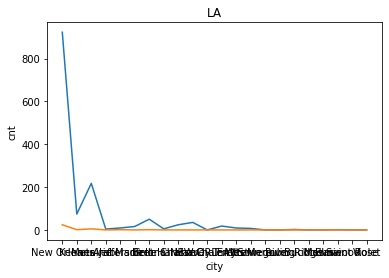

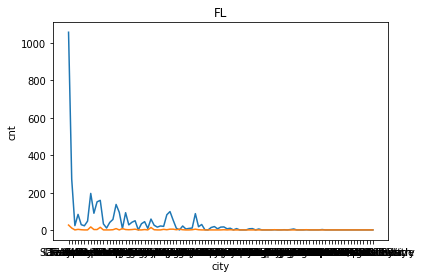

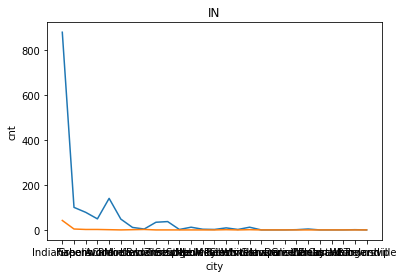

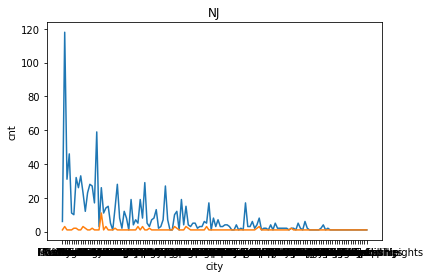

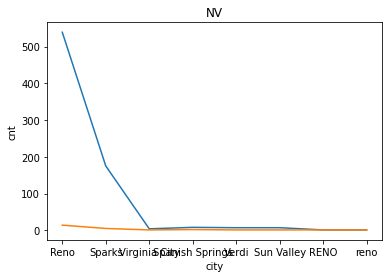

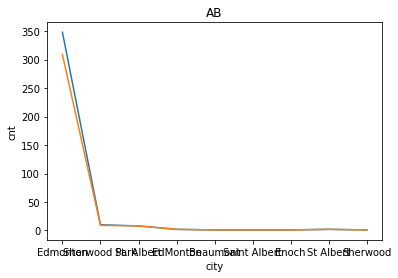

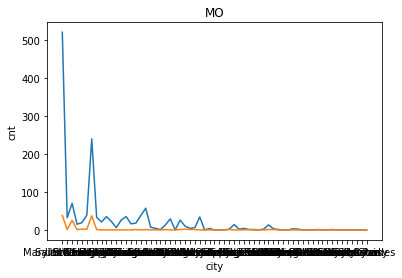

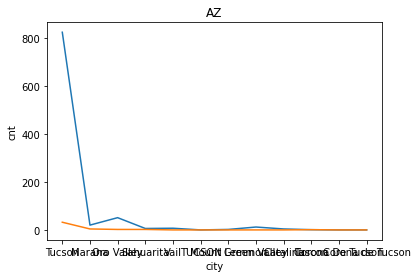

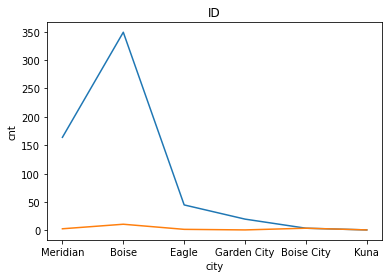

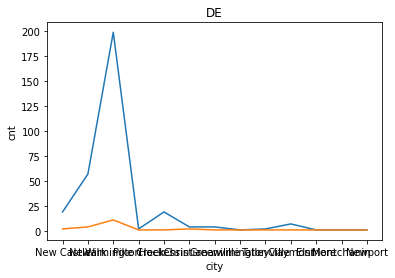

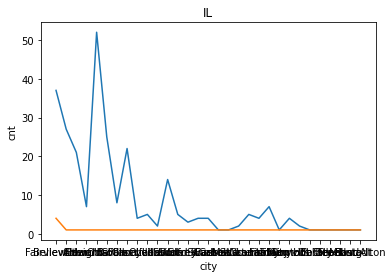

In [26]:
# Count the restaurant
cnt = 0

for state_name in Counter(df.state):
    plt.title(state_name)
    plt.xlabel('city')
    plt.ylabel('cnt')
    state = df[df.state == state_name]
    city_list = [c for c in Counter(state.city) ]
    restaurant_list = [ len(Counter(state[state.city == city_name].name)) for city_name in city_list]
    postal_code_list = [  len(Counter(state[state.city == city_name].postal_code)) for city_name in city_list]
    plt.plot(city_list, restaurant_list ,label = 'restaurant count')
    plt.plot(city_list, postal_code_list,label = 'postal code count')
    
    plt.show()


In [5]:
print(len(Counter(df.name)))

15522


In [28]:
# Count the restaurant's postal code
cnt = 0

restaurant_postal_count ={}
for i in Counter(df.name):
    tmp = df[df.name==i]
    restaurant_postal_count[i]=len(Counter(tmp.postal_code))


In [33]:
pd.DataFrame(Counter(restaurant_postal_count.values()).most_common(), columns=['branch count','No. of Restaurant'])

,branch count,No. of Restaurant
0,1,14353
1,2,679
2,3,191
3,4,90
4,5,51
5,7,24
6,6,18
7,12,12
8,9,10
9,8,10


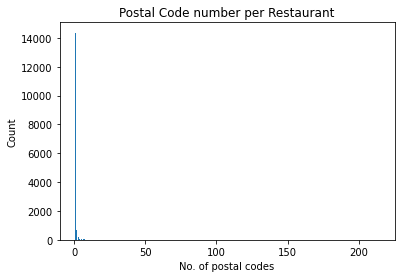

In [30]:
data = list(Counter(restaurant_postal_count).values())
c = Counter(data)
c = sorted(c.items())
months_num = [i[0] for i in c]
# month_names = [months[i[0]-1] for i in c]
freq = [i[1] for i in c]

# print(c)
# print(months)
# print(freq)


plt.bar(months_num, freq)
plt.title("Postal Code number per Restaurant")
plt.xlabel("No. of postal codes")
plt.ylabel("Count")

plt.show()

In [19]:
diff_list = []
for i in Counter(df.name):
    tmp = df[df.name==i]
    postal_code_list = [int(i) for i in Counter(tmp.postal_code) if i.isdigit()]
    if len(postal_code_list)>1:
        diff_list.append( max(postal_code_list)-min(postal_code_list))

<BarContainer object of 412 artists>

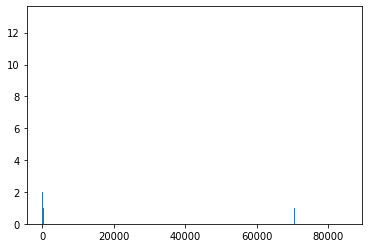

In [20]:
c = Counter(diff_list)
c = sorted(c.items())
diff = [i[0] for i in c]
freq = [i[1] for i in c]


plt.bar(diff, freq)

In [21]:
c

[(1, 10),
 (2, 5),
 (3, 8),
 (4, 11),
 (5, 11),
 (6, 7),
 (7, 2),
 (8, 4),
 (9, 8),
 (10, 5),
 (11, 2),
 (12, 9),
 (13, 2),
 (14, 1),
 (15, 10),
 (16, 13),
 (17, 1),
 (18, 4),
 (19, 2),
 (20, 3),
 (21, 3),
 (22, 2),
 (23, 1),
 (24, 3),
 (25, 3),
 (26, 6),
 (27, 4),
 (28, 3),
 (29, 1),
 (30, 1),
 (31, 5),
 (32, 3),
 (34, 1),
 (35, 1),
 (36, 3),
 (37, 2),
 (38, 2),
 (39, 2),
 (40, 2),
 (43, 6),
 (44, 4),
 (45, 1),
 (46, 1),
 (47, 2),
 (48, 1),
 (49, 2),
 (51, 2),
 (53, 3),
 (54, 2),
 (56, 4),
 (58, 1),
 (59, 1),
 (60, 4),
 (61, 1),
 (62, 1),
 (63, 2),
 (64, 1),
 (66, 1),
 (67, 1),
 (68, 5),
 (69, 1),
 (70, 1),
 (71, 2),
 (72, 2),
 (74, 3),
 (75, 3),
 (76, 1),
 (77, 1),
 (79, 1),
 (80, 1),
 (84, 1),
 (85, 2),
 (87, 3),
 (89, 3),
 (90, 2),
 (91, 2),
 (93, 2),
 (95, 2),
 (97, 4),
 (98, 1),
 (99, 2),
 (102, 3),
 (103, 1),
 (104, 1),
 (107, 3),
 (109, 1),
 (110, 1),
 (112, 2),
 (113, 1),
 (115, 2),
 (117, 1),
 (118, 1),
 (120, 1),
 (123, 1),
 (124, 1),
 (127, 1),
 (128, 3),
 (129, 1),
 (134, 

# By State
* Use FL for starters , only 7 seven cities

In [ ]:
df = df[df.state == 'FL']

In [ ]:
df.shape

In [ ]:
for_lda_df = df.copy()

In [ ]:
for_lda_df.shape

In [ ]:
# get the restaurants that has branches in at least 3 different cities
for j in Counter(df.name):
    tmp = df[df.name==j]
    if len(Counter(tmp.city))<3:
        df = df.drop(tmp.index)
        df.reset_index()

In [ ]:
df.shape

In [ ]:
for_lda_df[~for_lda_df.name.isin(df.name)]

In [ ]:
brand = Counter(df.name)
plt.bar(brand.keys(), brand.values())

In [ ]:
df.to_pickle("../Data/yelp/FL_only.pkl")  
for_lda_df.to_pickle("../Data/yelp/LDA_training.pkl")  

## Observe the Ratings by Brand

In [ ]:
# # count the cities by one brand 
# for i in Counter(df.name):
#     tmp = df[df.name==i]
#     print(Counter(tmp.city))

In [ ]:
# Count the overall std for each brand
l_= []
for i in Counter(df.name):
    tmp = df[df.name==i]
    dict_ = tmp.stars_x.describe().to_dict()
    dict_['name']=i
    l_.append(dict_)
b = pd.DataFrame(l_)
b

In [ ]:
# Count the std for each brand by city 
l_= []
for i in Counter(df.name):
    tmp = df[df.name==i]
    dict_ = tmp.stars_x.describe().to_dict()
    dict_['name']=i
    l_.append(dict_)
b = pd.DataFrame(l_)
b

## Obeserve the postal code

In [34]:
len(Counter(df.postal_code))

1081

In [35]:
# count the restaurant of an post code
cnt = 0

postal_restaurant_count ={}
for i in Counter(df.postal_code):
    tmp = df[df.postal_code==i]
    postal_restaurant_count[i]=len(Counter(tmp.name))


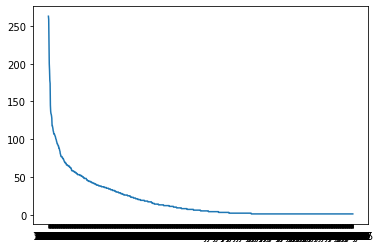

In [43]:
lists = sorted(postal_restaurant_count.items(),key=lambda x:x[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)

In [45]:
dict(sorted(postal_restaurant_count.items(),key=lambda x:x[1], reverse=True))

{'70130': 263,
 '19107': 259,
 '37203': 228,
 '19147': 200,
 '93101': 191,
 '19103': 178,
 '89502': 174,
 '33511': 145,
 '19104': 137,
 '33701': 134,
 '46032': 133,
 '83702': 131,
 '70115': 128,
 '46204': 118,
 '33607': 118,
 '85719': 116,
 '33602': 114,
 '70119': 111,
 '33706': 110,
 '93117': 107,
 '37209': 107,
 '46220': 107,
 '37067': 106,
 '33618': 105,
 '83642': 104,
 '19106': 103,
 '37214': 101,
 '37211': 100,
 '89431': 99,
 '70116': 97,
 '34698': 96,
 '89501': 94,
 '85705': 94,
 '19148': 93,
 '19123': 92,
 '33606': 91,
 '33612': 91,
 '37206': 88,
 '85711': 88,
 '33767': 87,
 '37064': 85,
 '46250': 84,
 '89511': 81,
 '19130': 80,
 '37027': 78,
 '70002': 77,
 '33609': 77,
 '85704': 77,
 '37075': 77,
 '70112': 76,
 '19406': 75,
 '19102': 75,
 '46240': 74,
 '63108': 74,
 '37122': 73,
 '93105': 72,
 '19146': 71,
 '33781': 70,
 '70118': 70,
 '85712': 69,
 '33578': 69,
 '46268': 68,
 '63301': 68,
 '85710': 68,
 '37201': 66,
 '46202': 66,
 '19125': 66,
 '63110': 66,
 '83646': 65,
 '6310